<h1><center>
    ECE 438 - Laboratory 2<br/>
    Image Processing Basics<br/>
    <br/>
    Date:<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to process images with simple operations (15 pts)**: *Output images, question*||||
|**Understanding of pixel distribution and linear transformation (25 pts)**: *Output images, histograms, code(pointTrans), questions*||||
|**Understanding of gamma correction (15 pts)**: *Output image, code(gammCorr), questions*||||
|**Understanding of image smoothing and sharpening (45 pts)**: *Output images, codes(convolve2d, gaussFilter, medianFilter), frequency response, questions*||||

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


# refer to https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. Load the image file ```yacht.tif```, which contains an $8$-bit monochrome image, using [`plt.imread()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imread.html).**

In [5]:
# insert your code here
A = plt.imread('yacht.tif')

**2. Display the type of this variable by printing its attribute [`dtype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.dtype.html).**

In [7]:
# insert your code here
print(A.dtype)


uint8


**3. Create a double precision representation of the image. Display the type of the matrix.**

In [8]:
# insert your code here
B = A.astype(np.float64)
print(B.dtype)

float64


**4. Display ```yacht.tif``` using the following commands:**
```python
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.show()
```

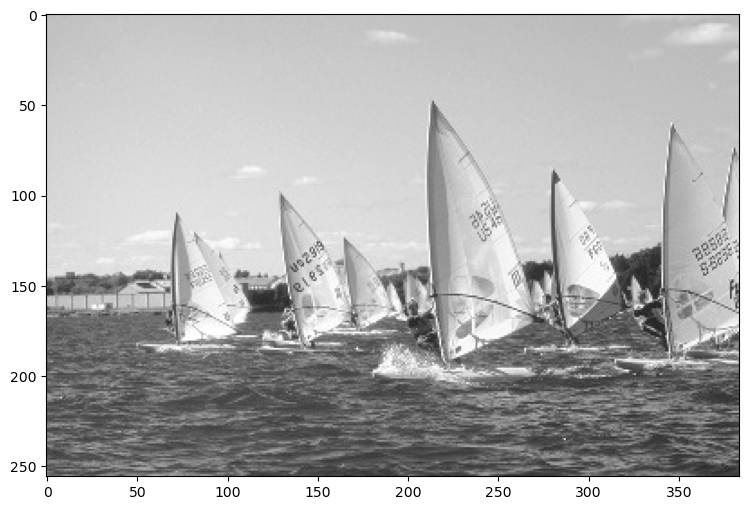

In [9]:
# insert your code here
plt.imshow(B, cmap='gray', vmin=0, vmax=255)
plt.show()

**5. Print the value of $f[35, 79]$ for this `yacht.tif` image.**

In [11]:
# insert your code here
print(A[35,79])


207


**6. Downsample this image by selecting every other row and column. Then, display it.**

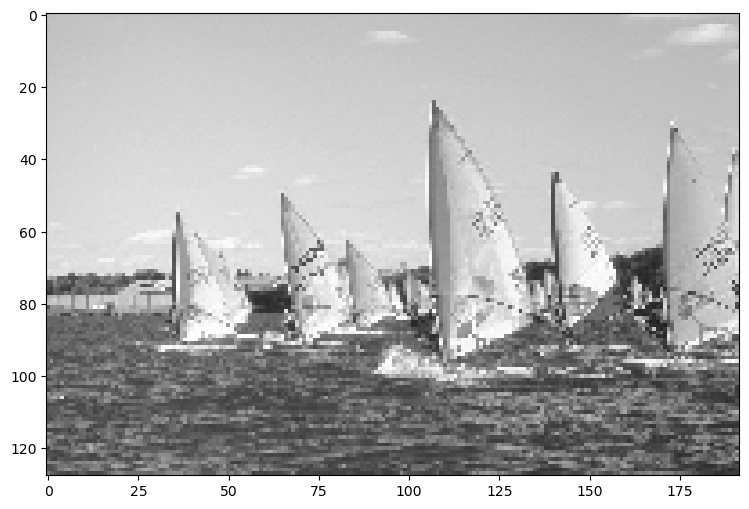

In [16]:
# insert your code here
downsampled_A = A[::2, ::2]
plt.imshow(downsampled_A, cmap='gray', vmin=0, vmax=255)
plt.show()


**7.  Make a horizontally flipped version of the image by reversing the order of each column. Then, display it.**

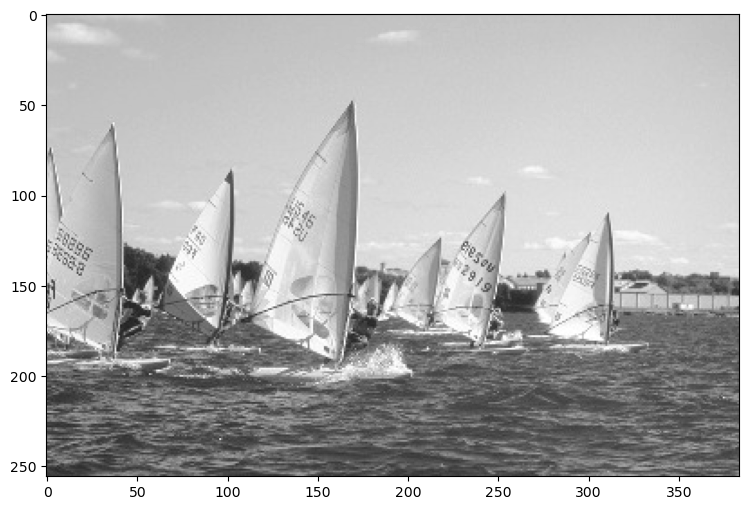

In [19]:
# insert your code here
flipped_A = np.flip(A, axis=1)
plt.imshow(flipped_A, cmap='gray', vmin=0, vmax=255)
plt.show()

**8. Similarly, create a vertically flipped image. Display it.**

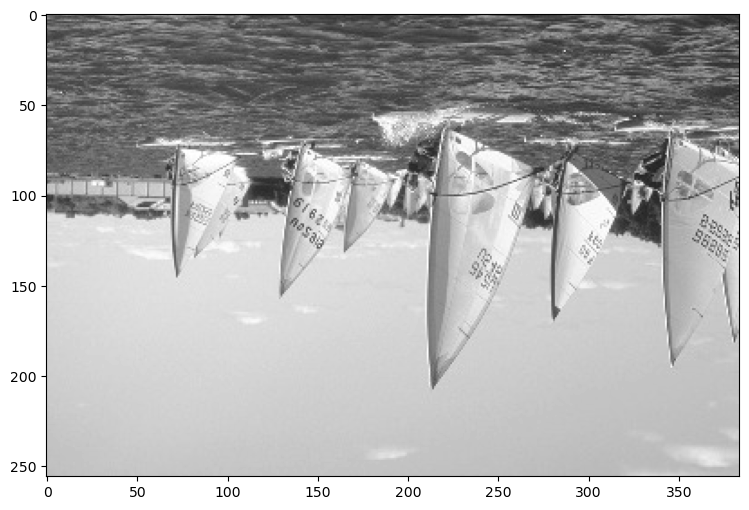

In [20]:
# insert your code here
vertical_A = np.flip(A, axis=0)
plt.imshow(vertical_A, cmap='gray', vmin=0, vmax=255)
plt.show()

**9. Create a “negative” of the image by subtracting each pixel from $255$. Then, display it.** 

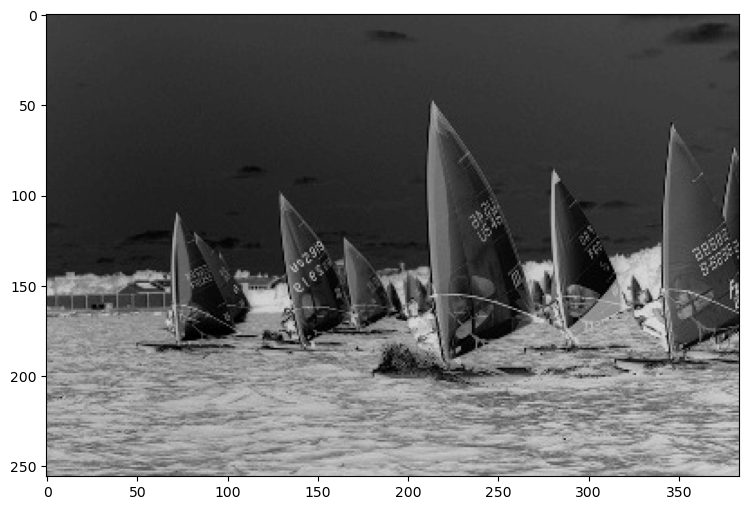

In [21]:
# insert your code here
A_negative = 255-A
plt.imshow(A_negative, cmap='gray', vmin=0, vmax=255)
plt.show()


**10. Multiply each pixel of the original image by $1.5$. Display it.**

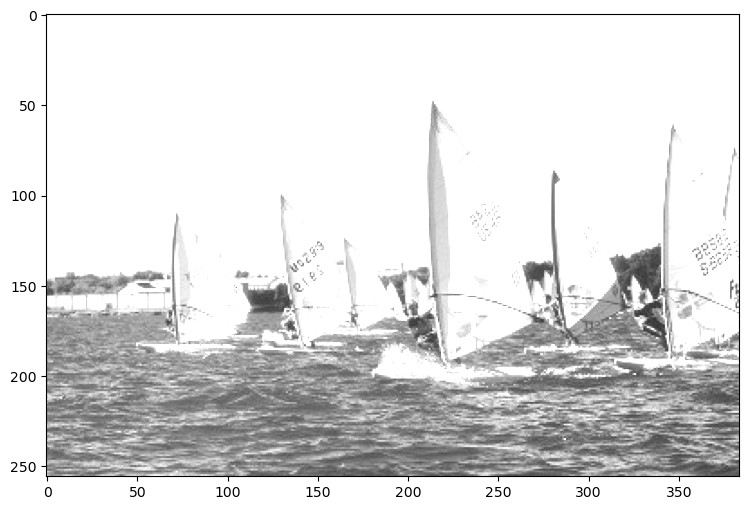

In [22]:
# insert your code here
A_multiply = A*1.5
plt.imshow(A_multiply, cmap='gray', vmin=0, vmax=255)
plt.show()

**11.  What effect did multiplying each pixel of the original image by $1.5$ have?**

It looks like multiplying each pixel of the original image increases the exposure/saturation of the original image. There are more white spots because of clipping at the 255 value point.

<h3 style="color:red;"><left>Exercise 3.2: Histogram of an Image</left></h3>

**1. Load the grayscale image ```house.tif``` and display it.**

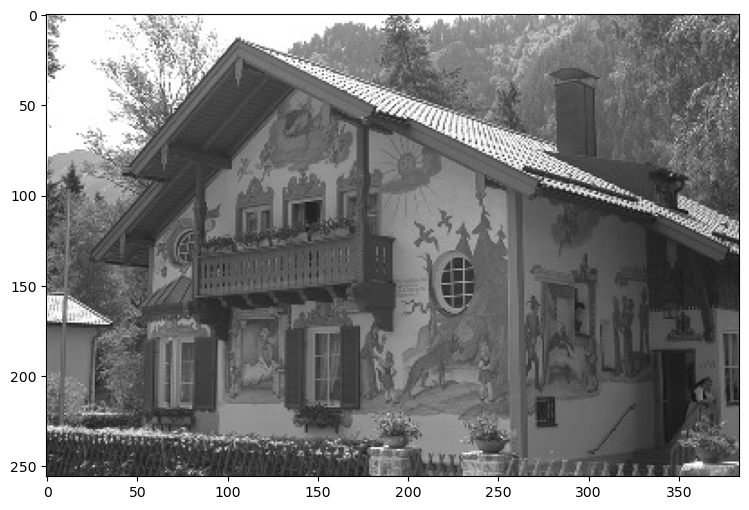

In [24]:
# insert your code here
C = plt.imread('house.tif')
plt.imshow(A, cmap='gray', vmin=0, vmax=255)
plt.show()


**2. Plot the histogram of the image. Lable the axes of the histogram and give it a title.**

**Note**: You may use [`plt.hist()`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) function. However, this function requires a vector as input. An example of using `plt.hist()` to plot a histogram of a matrix would be
```python
plt.hist(x.reshape(-1), bins=np.arange(256))  # reshape(-1) reshapes the original multi-dimension array to 1D
plt.title("title")
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.show()
```

Text(0, 0.5, 'freq')

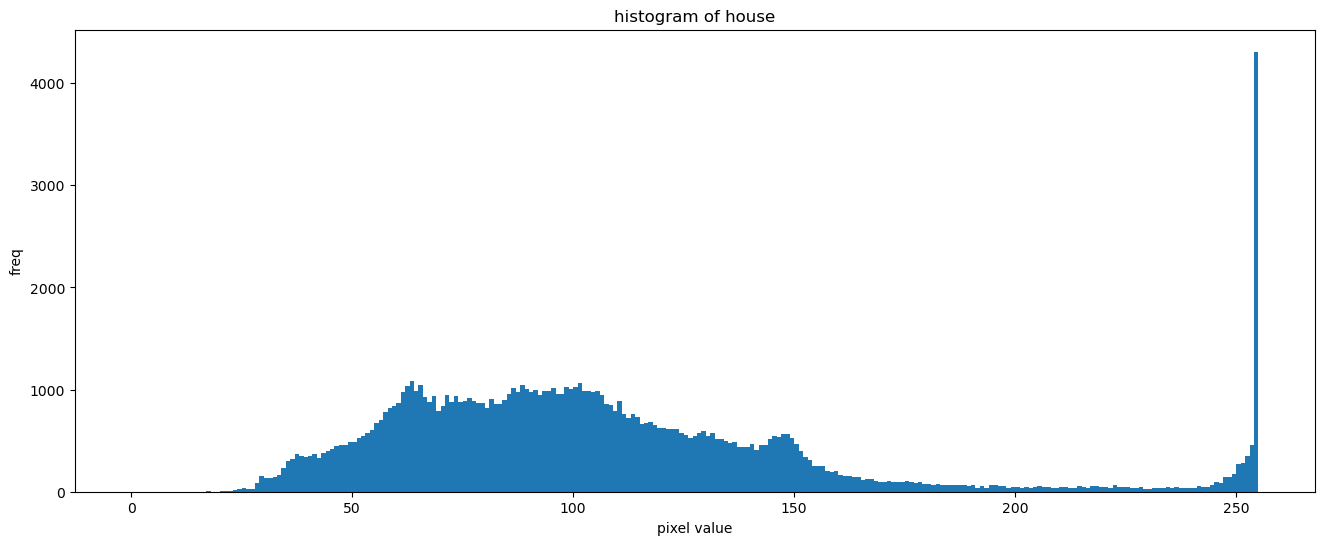

In [26]:
# insert your code here
plt.hist(C.reshape(-1), bins=np.arange(256))
plt.title("histogram of house")
plt.xlabel("pixel value")
plt.ylabel("freq")



<h3 style="color:red;"><left>Exercise 3.4: Pointwise Transformations</left></h3>

**1. Complete the function below that will perform the pixel transformation shown in Figure 3.**

**Hints:**
* Determine an equation for the graph in Fig. 3, and use this in your function. Notice you have three input regions to consider. You may want to create a separate function to apply this equation.
* If your function performs the transformation one pixel at a time, be sure to allocate the space for the output image at the beginning to speed things up.

In [ ]:
def pointTrans(x, T1, T2):
    """
    Parameters
    ---
    x: the input
    T1: the lower threshold
    T2: the upper threshold
    
    Returns
    ---
    y: the output
    """
    
    y = None
    return y

**2. Load the image file ```narrow.tif```. Display the image and its histogram.**

In [ ]:
# insert your code here


**3. Use your ```pointTrans()``` function to spread out the histogram using ```T1 = 70``` and ```T2 = 180```. Display the new image and its histogram.**

In [ ]:
# insert your code here


**4. What qualitative effect did the transformation have on the original image? Do you observe any negative effects of the transformation?**

insert your answer here

**5. Compare the histograms of the original and transformed images. Why are there zeros in the output histogram?**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.1: Gamma($\gamma$) Correction</left></h3>

**1. Complete the function below that will $\gamma$ correct an image by applying the inverse of equation (5).**

In [ ]:
def gammCorr(A, gamma):
    """
    Parameters
    ---
    A: the uncorrected image
    gamma: the gamma of the device
    
    Returns
    ---
    the corrected image
    """
    
    B = None
    return B

**2. Load the image file ```dark.tif```, which is an image that has not been $\gamma$ corrected for your monitor. Display it and observe the quality of the image.**

In [ ]:
# insert your code here


**3. Assume that the $\gamma$ for your monitor is $2.2$. Use your ```gammCorr()``` function to correct the
image for your monitor, and display the resultant image.**

In [ ]:
# insert your code here


**4. How did the correction affect the image? Does this appear to be the correct value for $\gamma$?**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.2: Color</left></h3>

**1. Load the image file ```girl.tif```. Check the size of array for this image by using the command ```print(image.shape)```, where ```image``` is the image matrix. Also, print the data type of this matrix.** 

Notice that this is a three dimensional array of type ```uint8```. It contains three gray scale image planes corresponding to the red, green, and blue components for each pixel. Since each color pixel is represented by three bytes, this is commonly known as a 24-bit image.

In [ ]:
# insert your code here


**2. Display the image. Note that ```cmap```, ```vmin```, ```vmax``` arguments are not needed.**

In [ ]:
# insert your code here


**3. Extract each of the color components, then plot each color component.**

Note that while the original is a color image, each color component separately is a monochrome image, so plotting each color component requires ```cmap```, ```vmin```, ```vmax``` arguments.

In [ ]:
# insert your code here


**4. Load the files ```ycbcr.npy``` using [`np.load()`](https://numpy.org/doc/stable/reference/generated/numpy.load.html), and print its type and data shape `dtype`.**

This file contains a NumPy array for a color image in $YC_bC_r$ format. The array contains three gray scale image planes that correspond to the luminance ($Y$) and two chrominance ($C_bC_r$) components.

In [ ]:
# insert your code here


**5. Plot each of the components.**

In [ ]:
# insert your code here


**6. Complete the function below that will perform the transformation of equation (2). It should accept a 3-D $YC_bC_r$ image array as input, and return a 3-D $RGB$ image array.**

* Make sure `ycbcr` is in `double` or `float` before any processing.
* After conversion, to make sure the values of `rgb` are in $[0,255]$, use [`np.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html).

In [ ]:
def ycbcr2rgb(ycbcr):
    """
    Parameters
    ---
    ycbcr: image in YCbCr
    
    Returns
    ---
    rgb: image RGB
    """
    
    rgb = None
    return rgb

**7. Now, convert the ycbcr array to an RGB representation and display the color image.**

* Before displaying the image, make sure its data type is `np.uint8`.

In [ ]:
# insert your code here


**8. Load the file ```h.npy```. This is a $5 \times 5$ Gaussian filter with $\sigma^2=2.0$. (See the first week of the experiment for more details on this type of filter.)**

In [ ]:
# insert your code here


**9. Alter the ```ycbcr``` array by filtering only the luminance component, ```ycbcr[:,:,0]```, using the Gaussian filter (use `convolve2d()` function from last lab). Convert the result to RGB, and display it.**

* Instead of altering the original `ycbcr`, you can create a copy by `ycbcr1 = ycbcr.copy()`.

In [ ]:
def convolve2d(image, kernel):
    """
    Parameters
    ---
    image: the input image
    kernel: the filter
    
    Returns
    ---
    filtered: the filtered image
    """
    filtered = None
    return filtered

In [ ]:
# insert your code here


**10. Now alter `ycbcr` by filtering both chrominance components, ```ycbcr[:,:,1]``` and ```ycbcr[:,:,2]```, using the Gaussian filter. Convert this result to RGB, and display it.**

* Again, instead of altering the original `ycbcr`, you can create a copy by `ycbcr2 = ycbcr.copy()`.

In [ ]:
# insert your code here
